In [1]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/lab8_partial.zip

--2020-05-25 07:28:42--  https://fmi-unibuc-ia.github.io/ia/Data/lab8_partial.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733250 (716K) [application/zip]
Saving to: ‘lab8_partial.zip’

lab8_partial.zip    100%[===================>] 716.06K  4.62MB/s    in 0.2s    

2020-05-25 07:28:42 (4.62 MB/s) - ‘lab8_partial.zip’ saved [733250/733250]



In [2]:
!unzip lab8_partial.zip

Archive:  lab8_partial.zip
  inflating: data/3d-points/x_test.txt  
  inflating: data/3d-points/x_train.txt  
  inflating: data/3d-points/y_test.txt  
  inflating: data/3d-points/y_train.txt  
  inflating: data/MNIST/test_images.txt  
  inflating: data/MNIST/test_labels.txt  
  inflating: data/MNIST/train_images.txt  
  inflating: data/MNIST/train_labels.txt  
  inflating: lab8_partial.ipynb      
  inflating: lab8_partial.py         


In [0]:
import numpy as np

In [0]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def plot3d_data_and_decision_function(X, y, W, b):
    ax = plt.axes(projection='3d')
    # create x,y
    xx, yy = np.meshgrid(range(10), range(10))
    # calculate corresponding z
    # [x, y, z] * [W[0], W[1], W[2]] + b = 0
    zz = (-W[0] * xx - W[1] * yy - b) / W[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r');
    plt.show()

In [0]:
test_images = np.loadtxt('data/MNIST/test_images.txt')
test_labels = np.loadtxt('data/MNIST/test_labels.txt')
train_images = np.loadtxt('data/MNIST/train_images.txt')
train_labels = np.loadtxt('data/MNIST/train_labels.txt')

[[-1.18841049 -1.33054551 -1.67664006]]
[16.9]
6
0.92


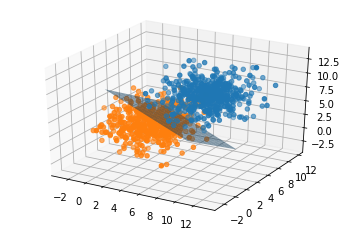

In [6]:
# 1.  Antrenati un perceptron pe multimea de puncte 3d, pana cand eroare nu se
# imbunatateste cu 1e-5 fata de epocile anterioare, cu rata de invatare 0.1. Calculati
# acuratetea pe multimea de antrenare si testare, apoi afisati ponderile, bias-ul si
# numarul de epoci parcuse pana la convergenta. Plotati planul de decizie al
# clasificatorului cu ajutorului functiei plot3d_data_and_decision_function.

from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(max_iter=100, tol=1e-5, shuffle=True, eta0=0.1, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5)
perceptron_model.fit(x_train, y_train)

print(perceptron_model.coef_)
print(perceptron_model.intercept_)
print(perceptron_model.n_iter_)

# accuracy
print(perceptron_model.score(x_test, y_test))
# plot
plot3d_data_and_decision_function(x_train, y_train, perceptron_model.coef_[0], perceptron_model.intercept_[0])

In [0]:
test_images = np.loadtxt('data/MNIST/test_images.txt')
test_labels = np.loadtxt('data/MNIST/test_labels.txt').astype(np.int)
train_images = np.loadtxt('data/MNIST/train_images.txt')
train_labels = np.loadtxt('data/MNIST/train_labels.txt').astype(np.int)

In [0]:
# 2. Antrenati o retea de perceptroni care sa clasifice cifrele scrise de mana
# MNIST. Datele trebuie normalizate prin scaderea mediei si impartirea la deviatia
# standard. Antrenati si testati urmatoarele configuratii de retele:

In [9]:
# a
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

mlp = MLPClassifier(hidden_layer_sizes=(1),
                    activation='tanh',
                    learning_rate_init=0.01,
                    max_iter=200,
                    momentum=0)

mlp.fit(train_images, train_labels)
mlp.score(test_images, test_labels)

0.19

In [17]:
# b
mlp = MLPClassifier(hidden_layer_sizes=(10),
                    activation='tanh',
                    learning_rate_init=0.01,
                    max_iter=200,
                    momentum=0)

mlp.fit(train_images, train_labels)
mlp.score(test_images, test_labels)

0.812

In [16]:
# c
mlp_classifier_model = MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(10),
                                     learning_rate_init=0.00001,
                                     momentum=0, max_iter=2000)

mlp_classifier_model.fit(train_images, train_labels)
print(mlp_classifier_model.score(test_images, test_labels))

0.804


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
# d
mlp_classifier_model = MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(10),
                                     learning_rate_init=10,
                                     momentum=0,
                                     max_iter=200)

mlp_classifier_model.fit(train_images, train_labels)
print(mlp_classifier_model.score(test_images, test_labels))

0.458


In [19]:
# e
mlp = MLPClassifier(hidden_layer_sizes=(10),
                    activation='tanh',
                    learning_rate_init=0.01,
                    max_iter=20,
                    momentum=0)

mlp.fit(train_images, train_labels)
mlp.score(test_images, test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.812

In [20]:
# f
mlp_classifier_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10), learning_rate_init=0.01, momentum=0, max_iter=2000)

mlp_classifier_model.fit(train_images, train_labels)
print(mlp_classifier_model.score(test_images, test_labels))

0.77


In [21]:
#j
mlp = MLPClassifier(activation = 'relu',
                    hidden_layer_sizes=(100, 100),
                    learning_rate_init=0.01,
                    momentum=0.9, 
                    max_iter=2000, 
                    alpha=0.005)
mlp.fit(train_images, train_labels)
mlp.score(test_images, test_labels)

0.888

In [22]:
# g
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10, 10), learning_rate_init=0.01, momentum=0, max_iter=2000)
mlp.fit(train_images, train_labels)
mlp.score(test_images, test_labels)

0.84

In [23]:
#h
mlp_classifier_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), learning_rate_init=0.01, momentum=0, max_iter=2000)

mlp_classifier_model.fit(train_images, train_labels)
print(mlp_classifier_model.score(test_images, test_labels))

0.87
